In [1]:
import matplotlib.pyplot as plt
import numpy as np
from numpy import sin, linspace, pi
from opensees import uniaxial
from opensees.units.english import ksi, psi, inch, ft

plt.style.use("berkeley")

In [2]:
# -----------
Fy = 66.8*ksi              # STEEL yield stress
Es = 29000.*ksi            # modulus of steel
Bs = 0.005                 # strain-hardening ratio 
R0 = 18                    # control the transition from elastic to plastic branches
cR1 = 0.925                # control the transition from elastic to plastic branches
cR2 = 0.15                 # control the transition from elastic to plastic branches

In [5]:
from math import sqrt
# nominal concrete compressive strength
fc = -8.5*ksi              # CONCRETE Compressive Strength ksi   (+Tension -Compression)
Ec = 57*ksi*sqrt(-fc/psi)  # Concrete Elastic Modulus
# unconfined concrete
fc1U = fc                  # UNCONFINED concrete (todeschini parabolic model) maximum stress
eps1U = -0.003             # strain at maximum strength of unconfined concrete
fc2U = 0.2*fc1U            # ultimate stress
eps2U = -0.01              # strain at ultimate stress
_lambda = 0.1              # ratio between unloading slope at eps2 and initial slope Ec
# tensile-strength properties
ftU = -0.14*fc1U           # tensile strength +tension
Ets = ftU/0.002            # tension softening stiffness

In [6]:
concU = uniaxial.Concrete02(1, fc1U, eps1U, fc2U, eps2U, _lambda, ftU, Ets)      # build cover, concrete (unconfined)
reinf = uniaxial.Steel02(None, Fy, Es, Bs, R0, cR1, cR2)                            # build 'reinforcement material

In [3]:
strain = 0.005*sin(linspace(0, 6*np.pi, 100))

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Text(0, 0.5, '$\\sigma$')

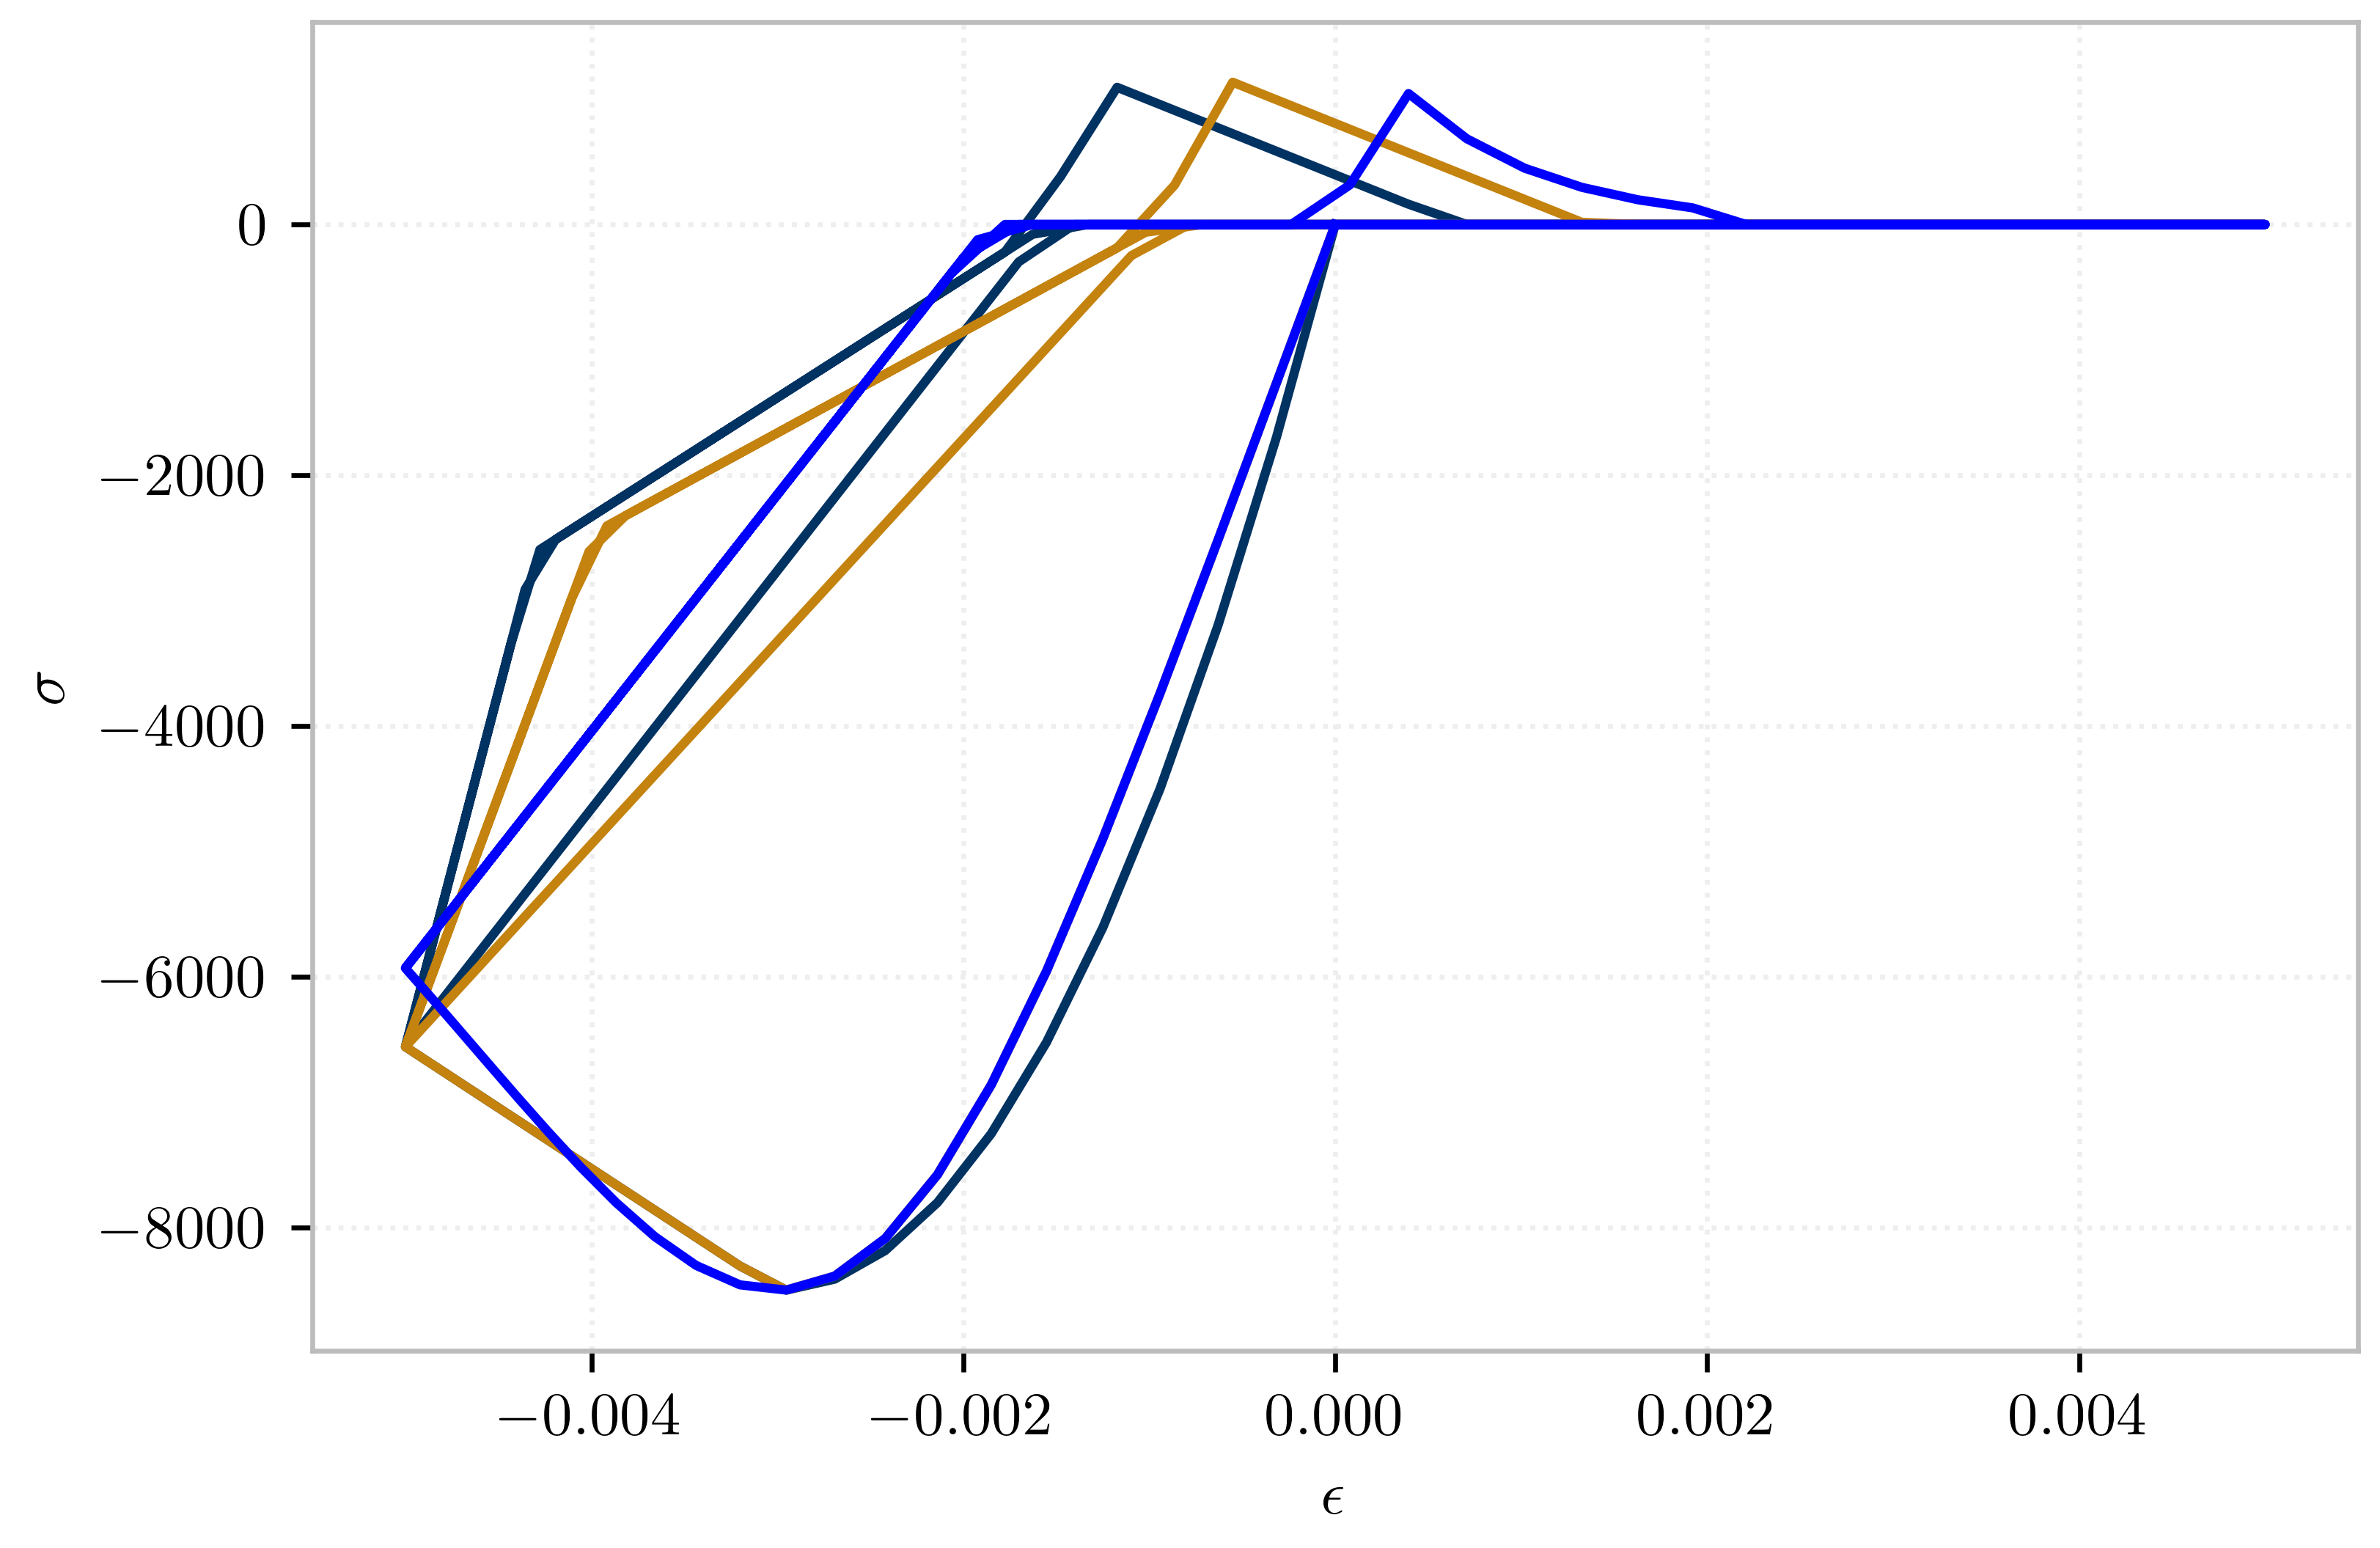

In [9]:
strain = -0.005*np.sin(np.linspace(0, 4*np.pi, 200))
fig, ax = plt.subplots()

with concU as c:
    stress = [c.getStress(e, commit=True) for e in strain]
    ax.plot(strain, stress)
    
with uniaxial.Concrete02IS(1, 4e3*ksi, fc1U, eps1U, fc2U, eps2U, [_lambda, ftU, Ets]) as conc:
    ax.plot(strain, [conc.getStress(e, commit=True) for e in strain])

with uniaxial.Concrete04(1, fc1U, eps1U, eps2U, 4e3*ksi, [ftU, ftU/Ets]) as conc:
    plt.plot(strain, [conc.getStress(e, commit=True) for e in strain])

# with uniaxial.ConfinedConcrete01(1, 'S4a', -30.0, 26081.0,  
#     300.0, 200.0, 100.0, 10.0, 100.0, 300.0, 206000.0, 0.0, 1000.0, 16.0,
#     varUB=True,
#     epscu=-0.03,
#     stRatio=0.85
# ) as c:
#     ax.plot(strain, [steel.getStress(e, commit=True) for e in strain], label="")
    

    
ax.legend()
ax.set_xlabel(r"$\epsilon$")
ax.set_ylabel(r"$\sigma$")

In [1]:
# strain =  -np.linspace(0, 0.005, 100)

# import pandas
# ax = pandas.read_csv("stressStrain.csv", names=["strain", "stress"]).plot("strain", "stress", marker=".", label="test")

# with uniaxial.Concrete02IS(1, 5e3*ksi, fc1U, eps1U, fc2U, eps2U, [_lambda, ftU, Ets]) as conc:
#     ax.plot(-strain, [-conc.getStress(e, commit=True) for e in strain], label="Concrete02IS")

# with concU as c:
#     stress = [-c.getStress(e, commit=True) for e in strain]
#     ax.plot(-strain, stress, label="Concrete02")

# with uniaxial.Concrete04(1, fc1U, eps1U, eps2U, 4e3*ksi, [ftU, ftU/Ets]) as conc:
#     ax.plot(-strain, [-conc.getStress(e, commit=True) for e in strain], label="Concrete04")

# ax.legend()
# ax.set_xlabel(r"$\epsilon$")
# ax.set_ylabel(r"$\sigma$");